In [1]:
from collections import OrderedDict
import gzip
import numpy as np
def load_motifs_from_file(file):
    motifs = OrderedDict()
    fp = open(file, "rb")
    for line in fp:
        line = line.decode('utf8').strip().split(": ")
        name = line[0]
        metrics = line[1].strip("[").strip("]").split(',')
        for i in range(len(metrics)):
            metrics[i] = float(metrics[i])
        motifs[name] = metrics
    fp.close()
    print("#Loaded " + str(len(motifs)) + " motifs from " + file)
    return motifs

In [2]:
deeplift_rcrs_all_zeroes = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rcrs_allzeros.txt')
deeplift_rcrs_avg_gc = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rcrs_avgc.txt')
deeplift_rcrs_shuff10 = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rcrs_shuff10.txt')
deeplift_rcrs_shuff20 = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rcrs_shuff20.txt')

deeplift_rs_all_zeroes = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rs_allzeros.txt')
deeplift_rs_avg_gc = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rs_avgc.txt')
deeplift_rs_shuff10 = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rs_shuff10.txt')
deeplift_rs_shuff20 = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rs_shuff20.txt')

#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rcrs_allzeros.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rcrs_avgc.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rcrs_shuff10.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rcrs_shuff20.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rs_allzeros.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rs_avgc.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rs_shuff10.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/deeplift_rs_shuff20.txt


In [3]:
def consolidate_deeplift_aurocs(all_zeroes, avg_gc, shuff10, shuff20):
    aurocs = OrderedDict()
    for motif in all_zeroes:
        aurocs[motif] = [all_zeroes[motif][0], avg_gc[motif][0], shuff10[motif][0], shuff20[motif][0]]
    return aurocs

In [4]:
deeplift_rcrs_aurocs = consolidate_deeplift_aurocs(deeplift_rcrs_all_zeroes, deeplift_rcrs_avg_gc, 
                                                   deeplift_rcrs_shuff10, deeplift_rcrs_shuff20)
deeplift_rs_aurocs = consolidate_deeplift_aurocs(deeplift_rs_all_zeroes, deeplift_rs_avg_gc, 
                                                   deeplift_rs_shuff10, deeplift_rs_shuff20)

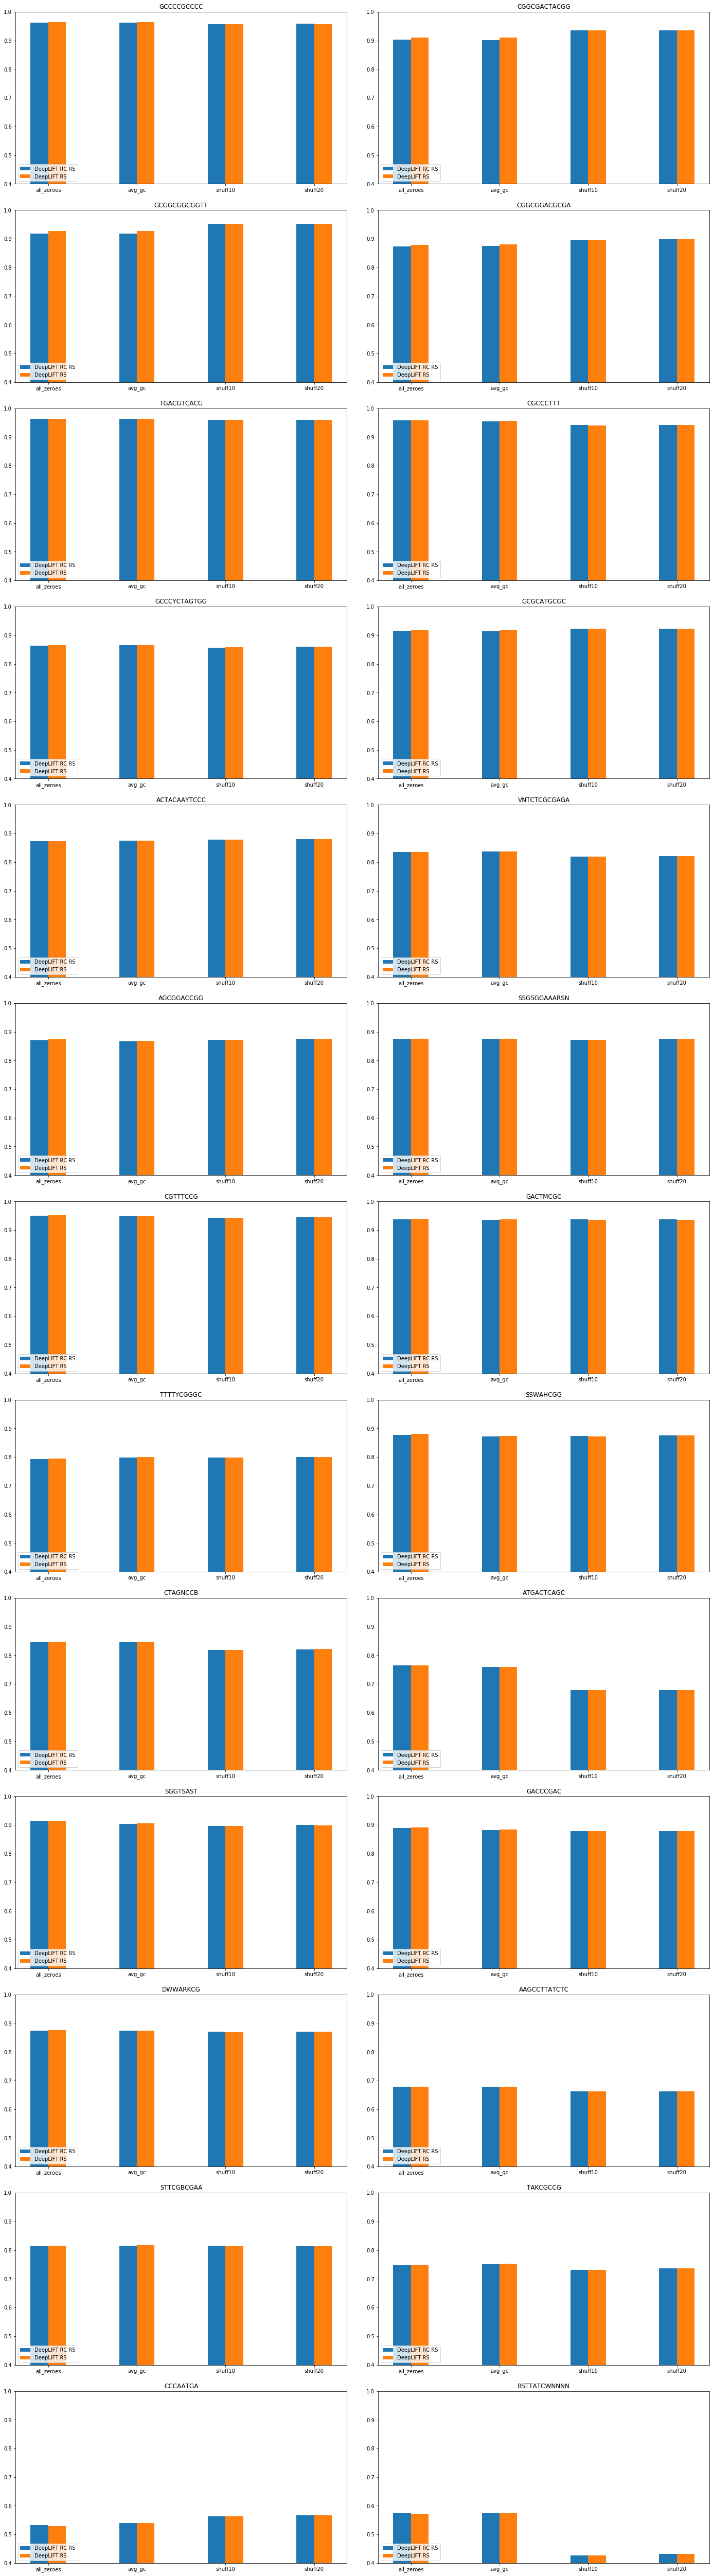

In [5]:
import numpy as np
import matplotlib.pyplot as plt

M = 26
N = 4
fig, axs = plt.subplots(13, 2, figsize=(20,70))
fig.tight_layout(pad=3.0)   
#fig.suptitle('DeepLIFT Choice of Reference Comparison')

m = 0

for r in range(13):
    for c in range(2):
        motif = list(deeplift_rcrs_all_zeroes.keys())[m]
        ind = np.arange(N)    
        width = 0.20         
        axs[r, c].set_title(motif)
    
        p1 = axs[r, c].bar(ind, deeplift_rcrs_aurocs[motif], width, bottom=0, align='center')
        p2 = axs[r, c].bar(ind + width, deeplift_rs_aurocs[motif], width, bottom=0, align='center')
    
        axs[r, c].set_xticks(ind + width / 2)
        axs[r, c].set_xticklabels(('all_zeroes', 'avg_gc', 'shuff10', 'shuff20'))
        axs[r, c].set_ylim(0.4, 1.0)
        axs[r, c].set_yticks((0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0))
        #axs[m].set_yticklabels(('0.5', '0.6', '0.7', '0.8', '0.9', '1.0'))
        axs[r, c].legend((p1[0], p2[0]), ('DeepLIFT RC RS', 'DeepLIFT RS'), loc='lower left')
        axs[r, c].autoscale_view()
        m = m + 1

plt.savefig('sim_pos_and_neg_deeplift_ref.png')
plt.show()

In [6]:
ig10_shuff10 = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ig10_shuff10.txt')
ig10_shuff20 = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ig10_shuff20.txt')
ig20_shuff10 = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ig20_shuff10.txt')
ig20_shuff20 = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ig20_shuff20.txt')

#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ig10_shuff10.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ig10_shuff20.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ig20_shuff10.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ig20_shuff20.txt


In [7]:
def consolidate_ig_aurocs(ig_shuff10, ig_shuff20):
    aurocs = OrderedDict()
    for motif in ig_shuff10:
        aurocs[motif] = [ig_shuff10[motif][0], ig_shuff20[motif][0]]
    return aurocs

In [8]:
ig10_aurocs = consolidate_ig_aurocs(ig10_shuff10, ig10_shuff20)
ig20_aurocs = consolidate_ig_aurocs(ig20_shuff10, ig20_shuff20)

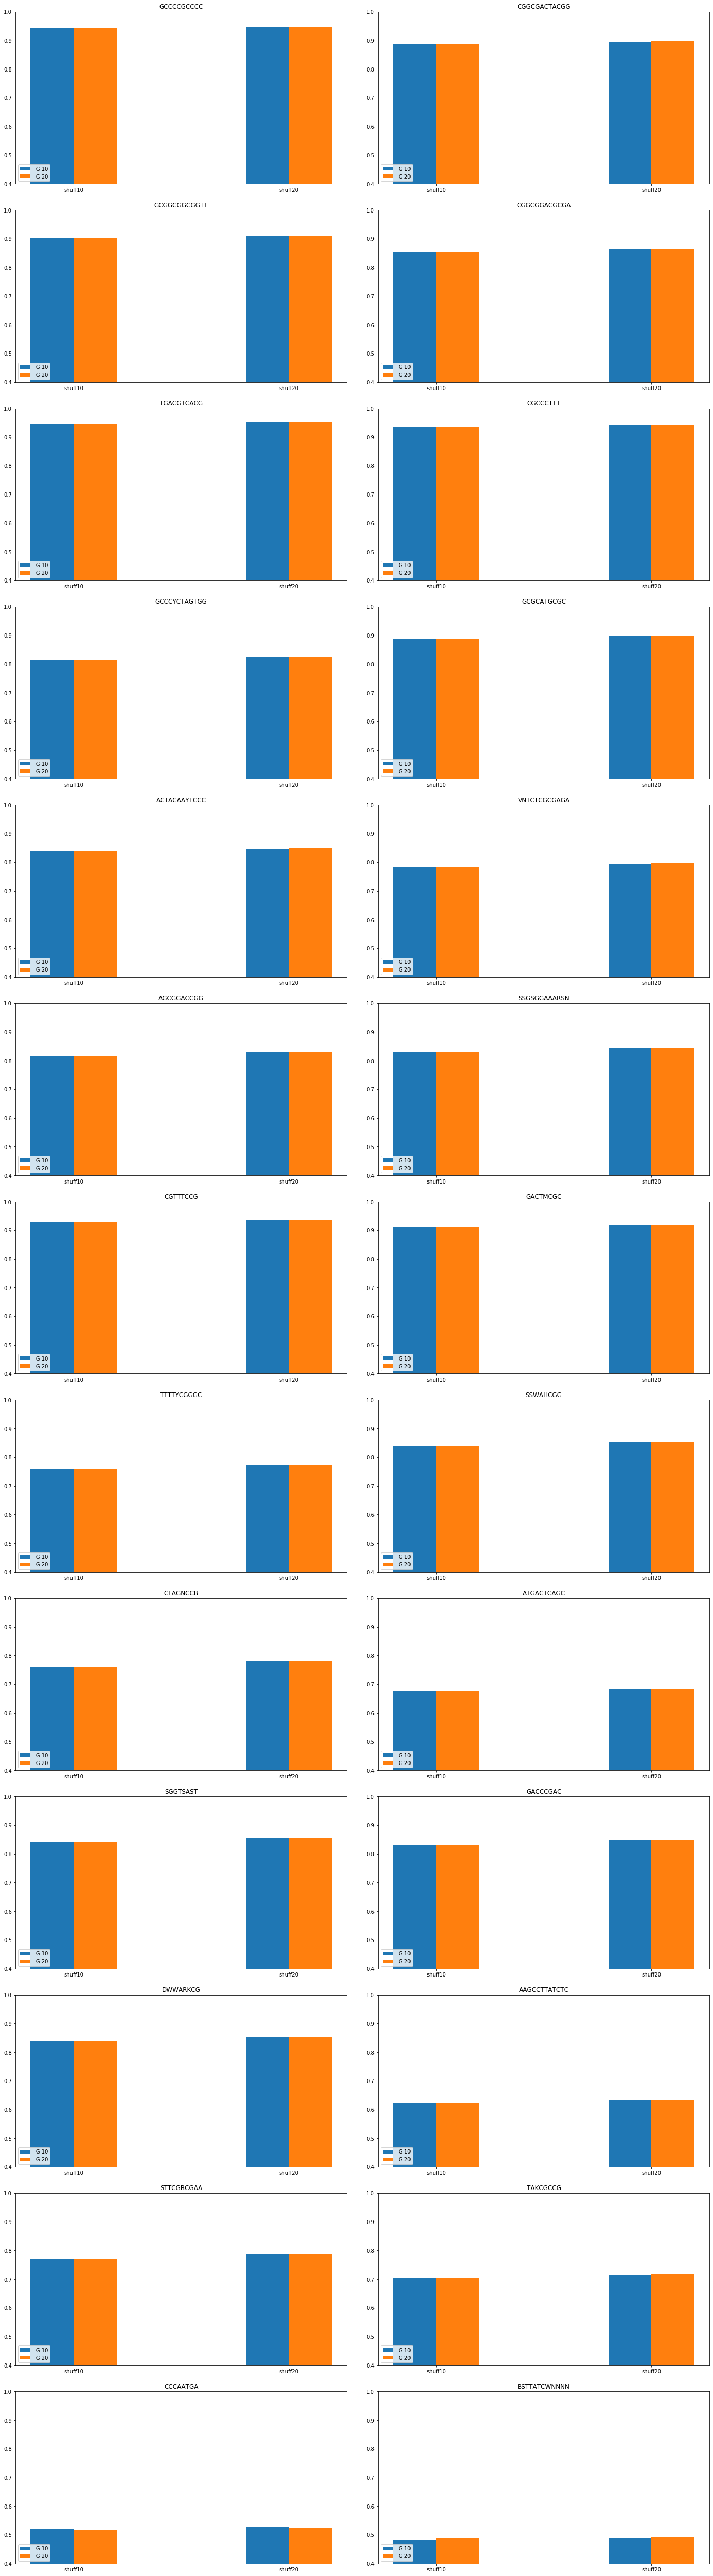

In [9]:
import numpy as np
import matplotlib.pyplot as plt

M = 26
N = 2
fig, axs = plt.subplots(13, 2, figsize=(20,70))
fig.tight_layout(pad=3.0)   
#fig.suptitle('DeepLIFT Choice of Reference Comparison')

m = 0

for r in range(13):
    for c in range(2):
        motif = list(deeplift_rcrs_all_zeroes.keys())[m]
        ind = np.arange(N)    
        width = 0.20         
        axs[r, c].set_title(motif)
    
        p1 = axs[r, c].bar(ind, ig10_aurocs[motif], width, bottom=0, align='center')
        p2 = axs[r, c].bar(ind + width, ig20_aurocs[motif], width, bottom=0, align='center')
    
        axs[r, c].set_xticks(ind + width / 2)
        axs[r, c].set_xticklabels(('shuff10', 'shuff20'))
        axs[r, c].set_ylim(0.4, 1.0)
        axs[r, c].set_yticks((0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0))
        #axs[m].set_yticklabels(('0.5', '0.6', '0.7', '0.8', '0.9', '1.0'))
        axs[r, c].legend((p1[0], p2[0]), ('IG 10', 'IG 20'), loc='lower left')
        axs[r, c].autoscale_view()
        m = m + 1
    
plt.savefig('sim_pos_and_neg_ig_set.png')
plt.show()

In [10]:
grad_times_input = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/grad_times_input.txt')
ism = load_motifs_from_file('/users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ism.txt')

#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/grad_times_input.txt
#Loaded 26 motifs from /users/eprakash/git/interpret-benchmark/notebooks/K562auROCauPRCResults/ism.txt


In [11]:
def consolidate_method_aurocs(deeplift_rcrs_shuff20, deeplift_rs_shuff20, ig20_shuff20, grad_times_input, ism):
    aurocs = OrderedDict()
    for motif in deeplift_rcrs_shuff20:
        aurocs[motif] = [deeplift_rcrs_shuff20[motif][0], deeplift_rs_shuff20[motif][0], ig20_shuff20[motif][0],
                        grad_times_input[motif][0], ism[motif][0]]
    return aurocs

In [12]:
method_aurocs = consolidate_method_aurocs(deeplift_rcrs_shuff20, deeplift_rs_shuff20, ig20_shuff20, grad_times_input, ism)

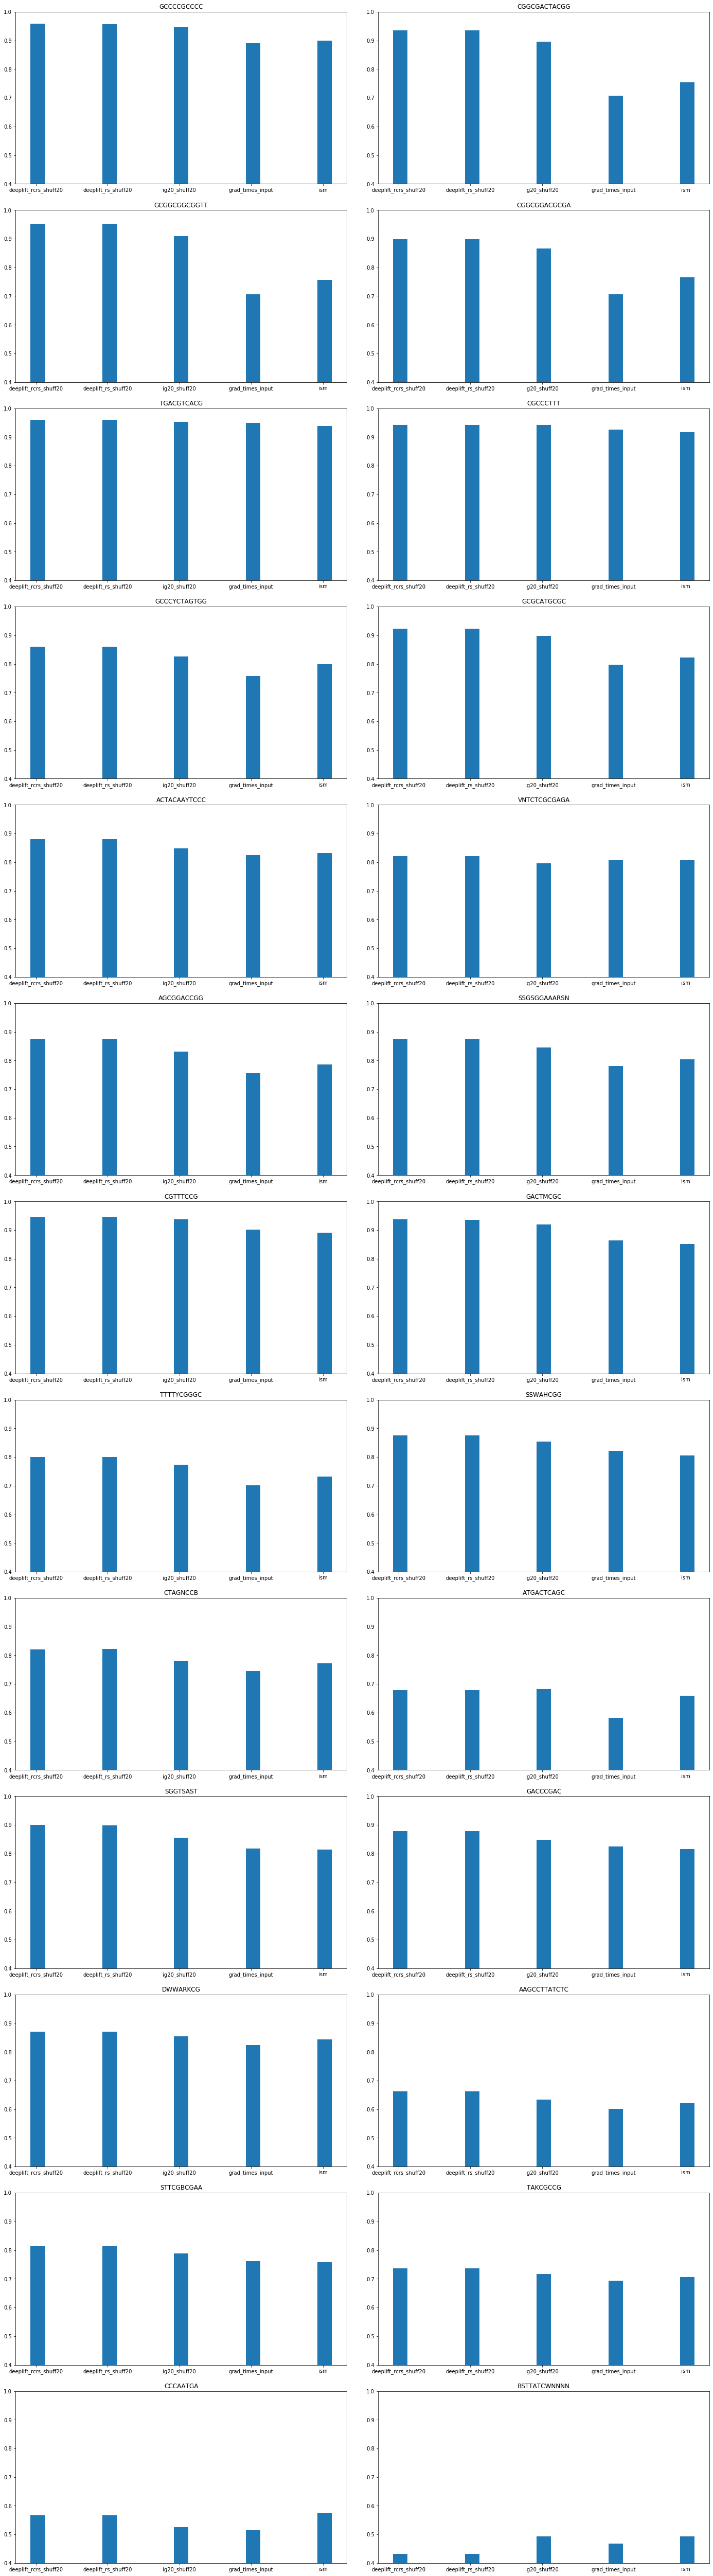

In [13]:
import numpy as np
import matplotlib.pyplot as plt

M = 26
N = 5
fig, axs = plt.subplots(13, 2, figsize=(20,70))
fig.tight_layout(pad=3.0)   
#fig.suptitle('DeepLIFT Choice of Reference Comparison')

m = 0

for r in range(13):
    for c in range(2):
        motif = list(deeplift_rcrs_all_zeroes.keys())[m]
        ind = np.arange(N)    
        width = 0.20         
        axs[r, c].set_title(motif)
    
        p1 = axs[r, c].bar(ind, method_aurocs[motif], width, bottom=0, align='center')
        #p2 = axs[r, c].bar(ind + width, ig20_aurocs[motif], width, bottom=0, align='center')
    
        axs[r, c].set_xticks(ind - width/8)
        axs[r, c].set_xticklabels(('deeplift_rcrs_shuff20', 'deeplift_rs_shuff20',
                                   'ig20_shuff20', 'grad_times_input', 'ism'))
        axs[r, c].set_ylim(0.4, 1.0)
        axs[r, c].set_yticks((0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0))
        #axs[m].set_yticklabels(('0.5', '0.6', '0.7', '0.8', '0.9', '1.0'))
        #axs[r, c].legend((p1[0], p2[0]), ('IG 10', 'IG 20'), loc='lower left')
        axs[r, c].autoscale_view()
        m = m + 1
        
plt.savefig('sim_pos_and_neg_methods.png')
plt.show()